In [9]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy as ccrs
import numpy as np
import plot_timeseries as pt
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
import datetime
import pandas as pd
import matplotlib as mpl

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
path = '/Users/johannemehren/filer/'

ds1 = xr.open_dataset(path + 'FULL-ERA5.tp.monzonmean.2000-2018.nc4')
ds1_regrid = xr.open_dataset(path + 'gridfile_test.nc')

ds2 = xr.open_dataset(path + 'erai.tp.ctp.monmean.zm.nc')
ds2_regrid = xr.open_dataset(path  + 'erai_regrid_5x5.nc')
ds2_newgrid = xr.open_dataset(path + 'erai.tp.monmean.gridera.nc')

ds_obs = xr.open_dataset(path + 'GPS-RO__CP_LR_5x5_2007-2018.nc')



In [12]:
obs_sl = ds_obs.resample(time='M').mean()
obs_l = obs_sl.sel(lat=slice(-20,20))

In [13]:
era5_sl = ds1.sel(time=slice('2007-01-01', '2018-12-31'), lat=slice(-20,20))
erai_sl = ds2.sel(time=slice('2007-01-01', '2018-12-31'), lat=slice(20,-20))

era5_5_5 = ds1_regrid.sel(time=slice('2007-01-01', '2018-12-31'), lat=slice(-20,20))

erai_5_5 = ds2_regrid.sel(time=slice('2007-01-01', '2018-12-31'), lat=slice(-20,20))
erai_1_1 = ds2_newgrid.sel(time=slice('2007-01-01', '2018-12-31'), lat=slice(-20,20))

In [14]:
era5_trop = era5_sl.mean(dim='lat')
erai_trop = erai_sl.mean(dim='lat')
obs_trop = obs_l.mean(dim=('lat', 'lon'))

era5_5_5_trop = era5_5_5.mean(dim=('lat','lon'))
erai_5_5_trop = erai_5_5.mean(dim=('lat', 'lon'))

erai_1_1_trop = erai_1_1.mean(dim=('lat', 'lon'))


In [15]:
diff_era5_ctpt = era5_trop.ctpt - obs_trop.CP_T.values
diff_erai_ctpt = erai_trop.ctpt - obs_trop.CP_T.values

diff_era5_coarse  = era5_5_5_trop.ctpt - obs_trop.CP_T.values
diff_erai_coarse  = erai_5_5_trop.ctpt - obs_trop.CP_T.values

diff_erai_finer = erai_1_1_trop.ctpt - obs_trop.CP_T.values

In [16]:
col_obs = 'coral'

era5_1 = 'darkblue'
era5_2 = 'cornflowerblue'

erai_1 = 'darkgreen'
erai_2 = 'limegreen'

col_1 = 'purple'
col_2 = 'magenta'

mpl.rcParams['lines.linewidth'] = 2.5

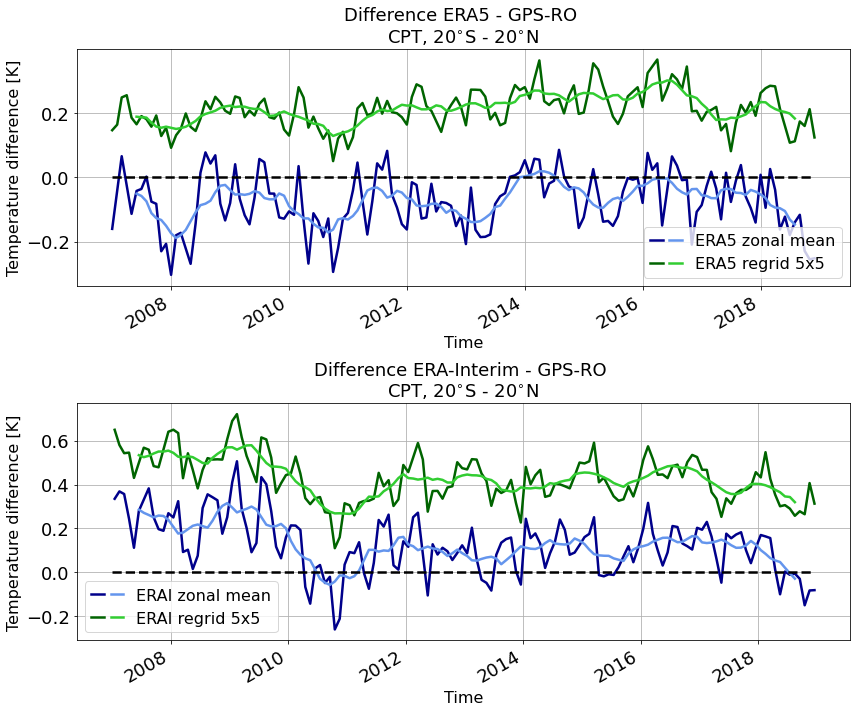

In [26]:
fig, axs = plt.subplots(2,1, figsize=(12,10))

p1, = diff_era5_ctpt.plot(ax = axs[0],color = era5_1)
p2, = diff_era5_ctpt.rolling(time=10, center=True).mean().plot(ax=axs[0], 
                                                        lw = 2.5, color=era5_2 )
p3, = diff_era5_coarse.plot(ax=axs[0], color = erai_1)
p4, = diff_era5_coarse.rolling(time=10, center=True).mean().plot(ax=axs[0], color = erai_2)
axs[0].plot(diff_era5_ctpt.time, np.zeros(144), 'k--')
axs[0].set_title('Difference ERA5 - GPS-RO \nCPT, $20^{\circ}$S - $20^{\circ}$N', fontsize=18)

p5,  = diff_erai_ctpt.plot(ax = axs[1],color = era5_1)
p6, = diff_erai_ctpt.rolling(time=10, center=True).mean().plot(ax=axs[1], color = era5_2)

p7, = diff_erai_coarse.plot(ax=axs[1], color = erai_1)
p8, = diff_erai_coarse.rolling(time=10, center=True).mean().plot(ax=axs[1], color = erai_2)

#p9, = diff_erai_finer.plot(ax=axs[1], color = col_1)
#p10, = diff_erai_finer.rolling(time=10, center=True).mean().plot(ax=axs[1], color = col_2)
axs[1].plot(diff_era5_ctpt.time, np.zeros(144), 'k--')

axs[1].set_title('Difference ERA-Interim - GPS-RO \nCPT, $20^{\circ}$S - $20^{\circ}$N', fontsize=18)



l = axs[0].legend([(p1, p2), (p3, p4)], ['ERA5 zonal mean', 'ERA5 regrid 5x5'], numpoints=1,
               handler_map={tuple: HandlerTuple(ndivide=None)}, fontsize=16)

l2 = axs[1].legend([(p5, p6), (p7, p8)], ['ERAI zonal mean', 'ERAI regrid 5x5'], numpoints=1,
               handler_map={tuple: HandlerTuple(ndivide=None)}, fontsize=16)

for ax in axs:
    ax.tick_params(axis="y", labelsize=18)
    ax.tick_params(axis="x", labelsize=18)

    ax.grid()
    ax.set_ylabel('Temperature difference [K]', fontsize=16)
    ax.set_xlabel('Time', fontsize=16)
    
plt.tight_layout()

#fig.savefig('Timeseries_diff_era5-erai-gpsro.png', dpi=1000)


In [ ]:
fig, axs = plt.plot(2,1, figsize=(16,12))

p1, =diff2_ctpt_era5.plot(ax=axs[0],  lw=2.5, color = blue1)
p2, = diff2_ctpt_era5.rolling(time=10, center=True).mean().plot(ax=axs[0], lw=2.5, color = blue2)
p3, = diff2_lrt_era5.plot(ax=axs[0], lw=2.5, color=gr1)
p4, = diff2_lrt_era5.rolling(time=10, center=True).mean().plot(ax=axs[0], lw=2.5, color=gr2)
axs[0].set_title('ERA5 - GPS-RO, 20$^{\circ}$ S - 20$^{\circ}$N, 2007-2018 \n Cold Point and Lapse Rate Temperature',
                fontsize=14)

p5, = diff2_ctpt_erai.plot(ax=axs[1], color = blue1, lw=2.5)
p6, = diff2_ctpt_erai.rolling(time=10, center=True).mean().plot(ax=axs[1], color=blue2, lw=2.5)
p7, = diff2_lrt_erai.plot(ax=axs[1], color=gr1, lw=2.5)
p8, = diff2_lrt_erai.rolling(time=10, center=True).mean().plot(ax=axs[1], color=gr2, lw=2.5)
axs[1].set_title('ERA-Interim - GPS-RO, 20$^{\circ}$ S - 20$^{\circ}$N, 2007-2018 \n Cold Point and Lapse Rate Temperature',
                fontsize=14)

l = axs[0].legend([(p1, p2), (p3,p4)], ['CPT', 'LRT'], numpoints=1,
               handler_map={tuple: HandlerTuple(ndivide=None)}, fontsize=16)
l2 = axs[1].legend([(p5, p6), (p7,p8)], ['CPT', 'LRT'], numpoints=1,
               handler_map={tuple: HandlerTuple(ndivide=None)}, fontsize=16)
axs[1].set_yticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

for ax in axs:
    ax.grid()
    ax.set_ylabel('Temperature difference', fontsize=14)
    ax.set_xlabel('Time', fontsize=14)
    ax.tick_params(axis="y", labelsize=14)
    ax.tick_params(axis="x", labelsize=14)
    
plt.tight_layout()